In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline # 여러작업을 결합해 하나의 작업으로 생성
import numpy as np

In [2]:
df = pd.read_csv('./data/final3.csv')
df

,rent_cnt,dust,temp,road_cnt,road_len,rain,강남구,강동구,강북구,강서구,...,맑음,비,폭우,평일,주말,공휴일,봄,여름,가을,겨울
0,-0.671517,-0.220561,-1.792863,0.088742,0.723189,-0.185544,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,-0.502717,-0.062739,-1.869878,0.088742,0.723189,-0.185544,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,-0.615250,0.068780,-1.927639,0.088742,0.723189,-0.185544,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,-0.671517,0.147691,-1.725476,0.088742,0.723189,-0.185544,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,-0.446450,-0.273169,-1.918012,0.088742,0.723189,-0.185544,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794401,-0.840317,-0.167954,-2.120175,3.058366,1.869792,-0.185544,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
794402,-0.755917,0.331817,-1.783237,3.058366,1.869792,-0.185544,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
794403,-0.699651,0.594854,-1.350030,3.058366,1.869792,-0.185544,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
794404,-0.671517,-0.273169,-1.763983,3.058366,1.869792,-0.185544,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [5]:
data = df

#### 다항회귀

In [4]:
y_target = data['rent_cnt']
X_data = data.drop(['rent_cnt'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [5]:
#(1) degree=2
# - 파이프라인 작업 구성
# Pipeline([('작업명',작업1), ('작업명',작업2),....('작업명',작업n)])
p_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# pipeline에 data를 전달 해서 학습
p_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])

In [6]:
# linear스텝의 속성 coef_를 반환
print('Polynomial 회귀 계수\n', np.round(p_model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [ 3.36669510e+05 -3.91006125e+09  1.42659742e+09  1.35387881e+10
 -7.22537746e+09 -1.60567084e+10  1.48228378e+10 -2.63516281e+09
 -2.06468045e+09  6.00203136e+09 -3.76583385e+08 -3.85218160e+09
 -4.06620174e+09  1.13490372e+09 -2.04166954e+08 -1.63990847e+09
 -4.94477940e+08  1.28467463e+09  7.21978858e+08 -1.14202094e+09
 -1.29490904e+09 -8.76541806e+08 -5.79733630e+07  2.43081879e+07
  7.78310026e+08 -2.27152415e+08  7.32123359e+07 -2.65723580e+08
 -8.68038669e+08 -4.25198668e+08  2.38474544e+08  1.87736963e+08
  1.28471780e+07 -6.70402875e+07  7.35667233e+08 -5.62907525e+08
 -8.53925465e+07  2.17437426e+07  1.00799910e+09 -7.19197172e+07
  1.54503709e+08  9.01428666e+08  1.86024208e+08  2.88845074e+08
  0.00000000e+00  4.00000000e-02 -6.64212429e+08  4.48755799e+08
  0.00000000e+00 -4.80934424e+08 -1.70682010e+08 -2.02418164e+07
 -2.87183082e+07 -1.92892472e+08 -2.38150277e+06  1.46785368e+08
  1.44675172e+08 -9.13770145e+07 -8.90662874e+07 -1.60708392e+08
  3.216

In [7]:
### 학습된 회귀식을 이용해 예측/평가
y_preds = p_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.789 , RMSE : 0.889
Variance score : 0.223


In [12]:
#(2) degree=2, include_bias 튜닝
# - 파이프라인 작업 구성
# Pipeline([('작업명',작업1), ('작업명',작업2),....('작업명',작업n)])
p_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

# pipeline에 data를 전달 해서 학습
p_model.fit(X_train, y_train)

### 학습된 회귀식을 이용해 예측/평가
y_preds = p_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.789 , RMSE : 0.889
Variance score : 0.223


### 릿지

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [12]:
y_target = data['rent_cnt']  # 타겟 데이터
X_data = data.drop(['rent_cnt'],axis=1,inplace=False) 

In [13]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5) # mse가 음수로 반환
rmse_scores = np.sqrt(-1*neg_mse_scores) # mse를 양수로 변환해 rmse 계산
avg_rmse = np.mean(rmse_scores)

In [14]:
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.328 -0.714 -1.163 -1.487 -0.512]
 5 folds 의 개별 RMSE scores :  [0.573 0.845 1.078 1.219 0.715]
 5 folds 의 평균 RMSE : 0.886 


#### alpha 값 변경하면서

In [15]:
# alpha 파라미터 값 정의
alphas = [0,0.1,1.,10,100]

for alpha in alphas :
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5) # mse가 음수로 반환
    rmse_scores = np.sqrt(-1*neg_mse_scores) # mse를 양수로 변환해 rmse 계산
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 0.886 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.886 
alpha 1.0 일 때 5 folds 의 평균 RMSE : 0.886 
alpha 10 일 때 5 folds 의 평균 RMSE : 0.886 
alpha 100 일 때 5 folds 의 평균 RMSE : 0.886 


#### 각 alpha에 따른 회귀 계수 값을 시각화

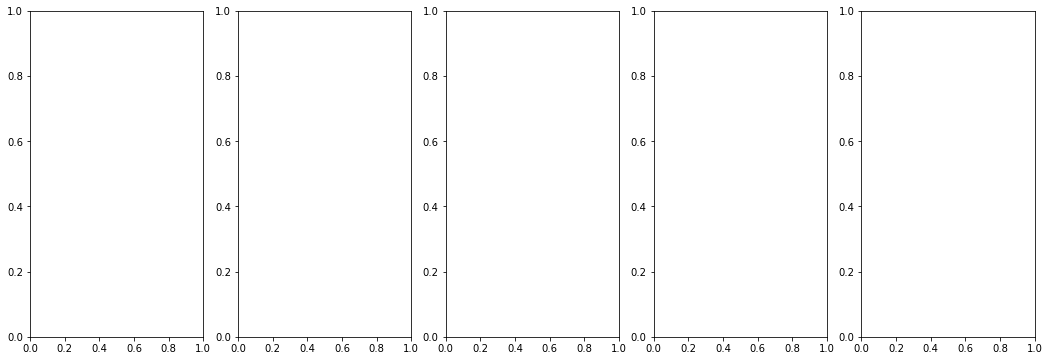

In [16]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

In [17]:
# 각 alpha에 따른 회귀계수 값을 데이터로 저장하기 위한 df 생성
coeff_df = pd.DataFrame()

In [19]:
# 한글 처리하는 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

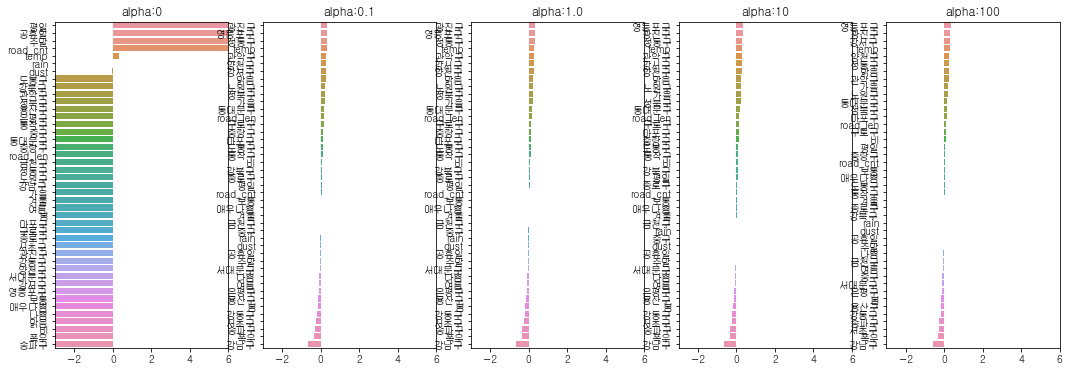

In [20]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha=alpha) # 초기화
    ridge.fit(X_data, y_target) #학습
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 df의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+ str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 
    # 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()

#### RMSE 평가 함수 생성
- 예측값이 log 변환된 값이므로 결국 RMSLE로 평가를 진행하게 됨

In [11]:
# 단일 모델의 RMSE 값 반환
def get_rmse(model): # 학습된 모델을 받아서 예측
    pred = model.predict(X_test) # 예측값은 log변환된 값
    mse = mean_squared_error(y_test , pred) # y_test 로그 변환된 값
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 여러 모델의 RMSE 값 반환
def get_rmses(models) :
    rmses = []
    for model in models :
        rmse = get_rmse(model) # 위에서 생성한 함수
        rmses.append(rmse)
    return rmses

In [13]:
## 데이터 분할
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 타깃과 피처
y_target = data['rent_cnt']
X_features = data.drop('rent_cnt',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

#### 모델 학습/예측/평가 |

In [14]:
# 기본 파라미터 이용
# 일반 선형 회귀
lr_reg = LinearRegression() 
lr_reg.fit(X_train, y_train)

# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

# 라쏘 회귀
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [15]:
models= [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) #학습된 모델 전달하고
# 각 모델에 대한 rmse값 반환

LinearRegression 로그 변환된 RMSE: 0.893
Ridge 로그 변환된 RMSE: 0.893
Lasso 로그 변환된 RMSE: 0.997


[0.8929495947358396, 0.8929429743240949, 0.9969544131449393]

#### 결과
- 라쏘 회귀가 타 회귀 방식보다 상대적으로 성능이 떨어진다

#### 회귀계수의 시각화
- 변수가 많으므로 상위10개 하위 10개의 피처명과 회귀계수값을 반환하는 함수를 작성해서 사용

In [16]:
# 학습된 모델을 전달받아 모델의 회귀계수 중 계수가 큰 상위 10개 하위 10개를 반환하는 함수
def get_top_bottom_coef(model) :
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

In [17]:
# 모델별 회귀 계수 시각화 함수
# list 객체로 모델을 입력 받아서
# 모델별로 회귀 계수 상위 10개, 하위 10개 추출해서
# 가로 막대 그래프 형태로 출력
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

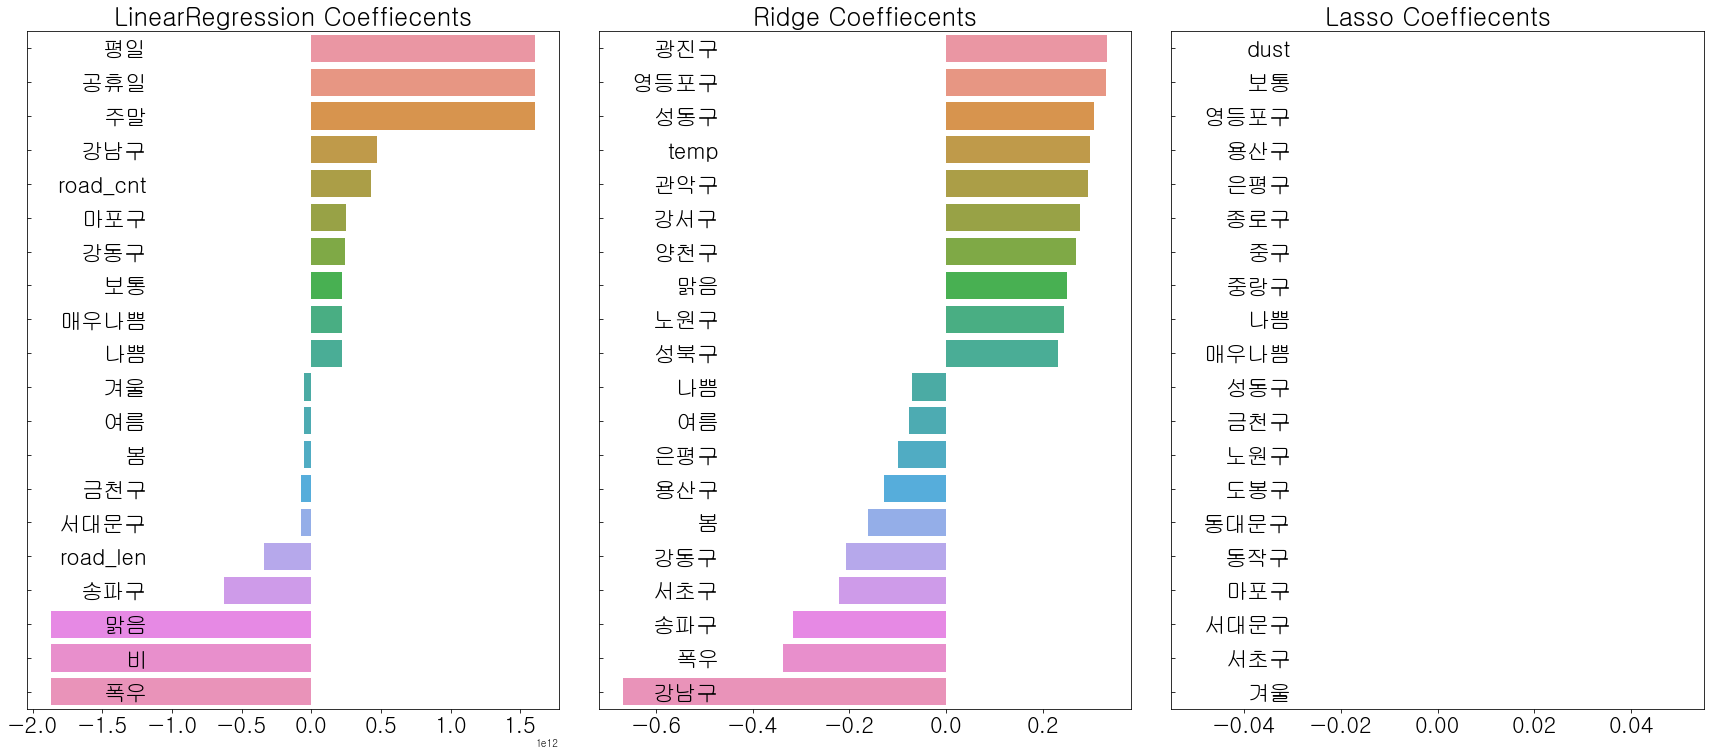

In [20]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#### 5 폴드 교차검증으로 모델별로  RMSE와 평균 RMSE 출력

In [21]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models) :
    
    for model in models :
        # 분할하지 않고 전체 데이터세트로 교차검증 수행
        # 평가지표가 -mse로 반환되므로 -연산을 한번 더 진행해서 양수로 변환
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))     

In [22]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.573 0.845 1.079 1.219 0.715]
LinearRegression CV 평균 RMSE 값: 0.886

Ridge CV RMSE 값 리스트: [0.573 0.845 1.078 1.219 0.715]
Ridge CV 평균 RMSE 값: 0.886

Lasso CV RMSE 값 리스트: [0.761 0.873 1.199 1.377 0.762]
Lasso CV 평균 RMSE 값: 0.995


#### 결과
- 5개 폴드 세트로 학습한 후 평가해도 
    - 여전히 라쏘 모델이 다른 회귀 모델에 비해 성능이 떨어짐

#### 리지/라쏘 모델에 대해 alpha 하이퍼파라미터 튜닝 후 재학습/예측/평가

In [23]:
from sklearn.model_selection import GridSearchCV
# 모델과 하이퍼 파라미터 딕셔너리 객체를 받아서
# 최적화 작업의 결과를 표시하는 함수
# 릿지 모델과 라쏘 모델의 최적화 alpha 값 추출
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_ # 최적 파라미터로 재학습된 모델 반환

In [24]:
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
# 기본 값으로 학습을 진행했을 때 회귀계수가 유난히 작게 나왔음
# 알파값을 작은 단위로 튜닝 진행

In [25]:
best_ridge=get_best_params(ridge_reg,ridge_params)
best_lasso = get_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.9169, 최적 alpha:{'alpha': 15}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.9166, 최적 alpha:{'alpha': 0.001}


#### 결과
- 릿지 모델: alpha가 15에서 최적 평균 RMSE가 0.9619
- 라쏘 모델: alpha가 0.001에서 최적 평균 RMSE가 0.9166
- **라쏘: alpha 최적화한 후 예측성능이 향상 됨 (0.995 -> 0.9166)**

#### 분할된 트레인 테스트 데이터를 이용해 학습 후 평가

In [26]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [27]:
# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.893
Ridge 로그 변환된 RMSE: 0.893
Lasso 로그 변환된 RMSE: 0.893


[0.8929495947358396, 0.8929436995073432, 0.8934009254982282]

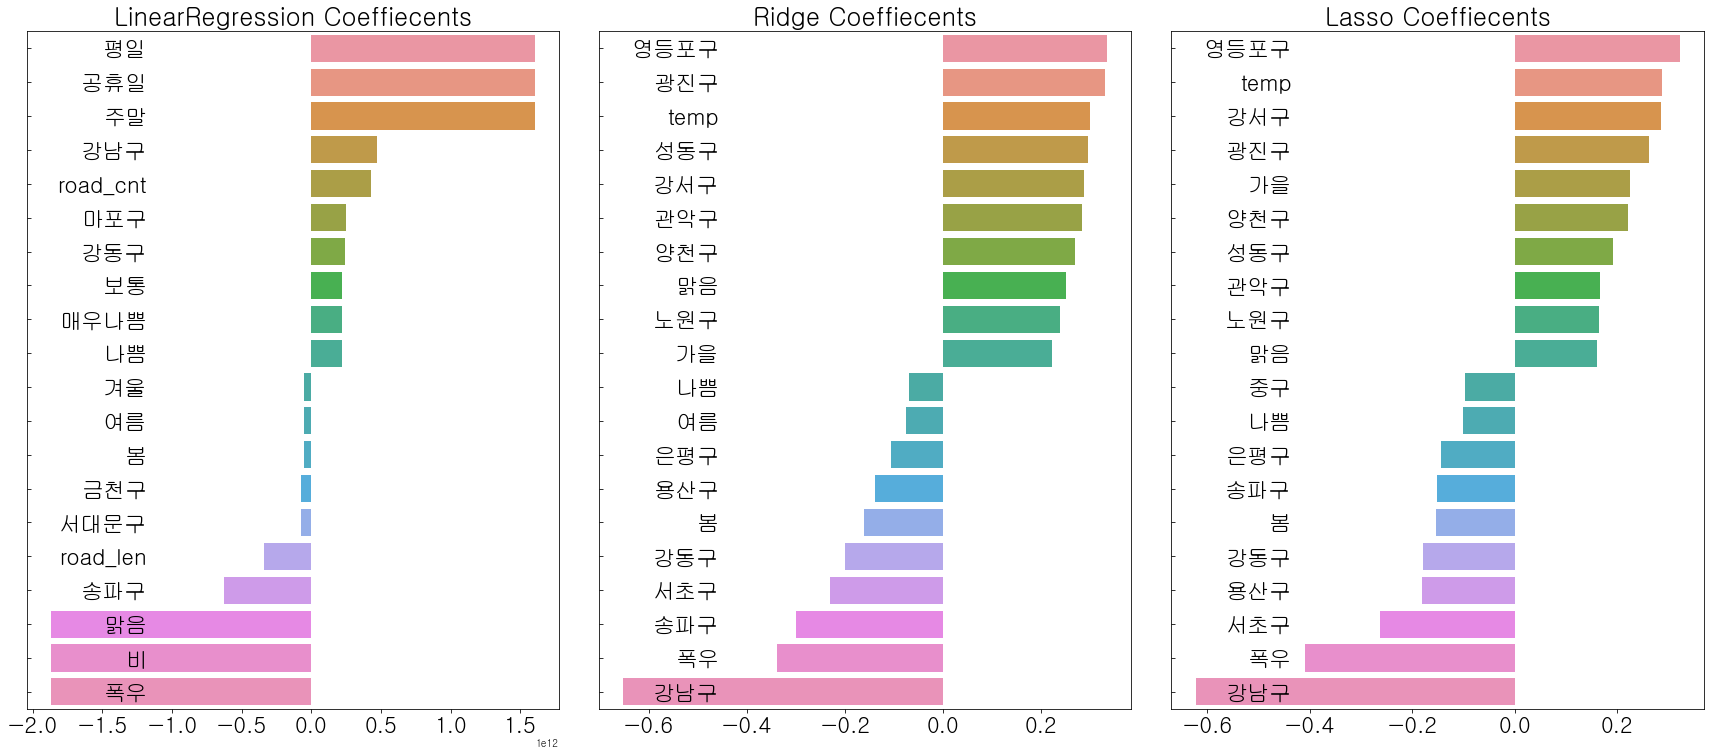

In [28]:
# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#### ridge_reg는 회귀 모델들의 예측 결과 혼합을 통한 최종 예측 ~~~ 을 가져옴

In [29]:
# 개별 모델 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

In [32]:
# XGBoost와 LightGBM 모두 수행 시간이 오래 걸릴 수 있는 관계로
# 하이퍼 파라미터 설정을 미리 적용한 상태로
# 5 폴드 세트에 대한 평균 RMSE 값 추출

from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}

xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                      colsample_bytree=0.5, subsample=0.8)

best_xgb = get_best_params(xgb_reg, xgb_params )

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.9355, 최적 alpha:{'n_estimators': 1000}


In [33]:
# 이번에는 LightGBM 회귀 트리 적용
# 기본 셋팅 적용

from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = get_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.9283, 최적 alpha:{'n_estimators': 1000}


In [34]:
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)